# DSML Single  Project
**Title: Shaping the Future of Colorectal Cancer Survival by Advancing Insights Today**

This notebook performs data preprocessing, EDA, model training, comparison, evaluation, and feature importance analysis.

## 1. Data Loading and Preprocessing

In [87]:
# import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data
train = pd.read_csv("/content/patient_train_data.csv")
test = pd.read_csv("/content/patient_test_data.csv")

In [ ]:
train.head()

In [4]:
test.head()

,ID,Alcohol Consumption,Cancer Stage,Country,Date of Birth,Diabetes,Diabetes History,Diet Risk,Early Detection,Family History,...,Mortality Rate per 100K,Non Smoker,Obesity BMI,Physical Activity,Screening History,Smoking History,Transfusion History,Treatment Type,Tumor Size (mm),Urban or Rural
0,75036,Yes,Localized,UK,17-11-1947,No,No,Low,Yes,No,...,5.0,Yes,Overweight,Low,Regular,No,-,Combination,69.0,Urban
1,75037,No,Regional,USA,26-03-1942,No,No,High,No,No,...,11.0,Yes,Obese,Low,Regular,No,-,Surgery,14.0,Urban
2,75038,Yes,Localized,Germany,06-06-1936,Yes,No,Low,Yes,Yes,...,11.0,Yes,Overweight,High,Irregular,No,-,Radiotherapy,19.0,Rural
3,75039,Yes,Regional,Japan,16-06-1971,No,No,High,Yes,No,...,13.0,Yes,Normal,High,Never,No,-,Chemotherapy,71.0,urban
4,75040,No,Metastatic,Japan,05-04-1972,No,No,Moderate,Yes,No,...,20.0,Yes,Overweight,Moderate,Irregular,No,-,Surgery,42.0,Urban


In [5]:
# see statistics
train.describe()

,ID,Healthcare Costs,Incidence Rate per 100K,Marital Status,Mortality Rate per 100K,Tumor Size (mm)
count,75035.000000,74982.000000,74999.000000,0.0,74974.000000,74962.000000
mean,37518.000000,72551.277478,34.552283,NaN,17.054440,42.054665
std,21660.883061,27536.228351,14.511506,NaN,7.206834,21.733090
min,1.000000,-69123.238747,10.000000,NaN,-16.612959,5.000000
25%,18759.500000,48788.250000,22.000000,NaN,11.000000,23.000000
50%,37518.000000,72531.500000,34.000000,NaN,17.000000,42.000000
75%,56276.500000,96426.750000,47.000000,NaN,23.000000,61.000000
max,75035.000000,213690.042716,109.212990,NaN,51.679554,155.758628


In [6]:
test.describe()

,ID,Healthcare Costs,Incidence Rate per 100K,Marital Status,Mortality Rate per 100K,Tumor Size (mm)
count,75000.000000,74946.000000,74983.000000,0.0,74938.000000,74939.000000
mean,112535.500000,72377.536226,34.535161,NaN,16.994529,42.012704
std,21650.779432,27338.747052,14.440854,NaN,7.225345,21.682674
min,75036.000000,25000.000000,10.000000,NaN,5.000000,5.000000
25%,93785.750000,48740.250000,22.000000,NaN,11.000000,23.000000
50%,112535.500000,72176.500000,35.000000,NaN,17.000000,42.000000
75%,131285.250000,96121.750000,47.000000,NaN,23.000000,61.000000
max,150035.000000,119998.000000,59.000000,NaN,29.000000,79.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75035 entries, 0 to 75034
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75035 non-null  int64  
 1   Alcohol Consumption         74983 non-null  object 
 2   Cancer Stage                75022 non-null  object 
 3   Country                     74985 non-null  object 
 4   Date of Birth               74975 non-null  object 
 5   Diabetes                    75021 non-null  object 
 6   Diabetes History            75035 non-null  object 
 7   Diet Risk                   74987 non-null  object 
 8   Early Detection             75005 non-null  object 
 9   Family History              74989 non-null  object 
 10  Gender                      74956 non-null  object 
 11  Genetic Mutation            75005 non-null  object 
 12  Healthcare Access           74972 non-null  object 
 13  Healthcare Costs            749

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          75000 non-null  int64  
 1   Alcohol Consumption         74944 non-null  object 
 2   Cancer Stage                74990 non-null  object 
 3   Country                     74950 non-null  object 
 4   Date of Birth               74949 non-null  object 
 5   Diabetes                    74982 non-null  object 
 6   Diabetes History            75000 non-null  object 
 7   Diet Risk                   74963 non-null  object 
 8   Early Detection             74941 non-null  object 
 9   Family History              74935 non-null  object 
 10  Gender                      74935 non-null  object 
 11  Genetic Mutation            74982 non-null  object 
 12  Healthcare Access           74923 non-null  object 
 13  Healthcare Costs            749

In [9]:
# Lowercase column names
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [10]:
train.head(2)

,id,alcohol consumption,cancer stage,country,date of birth,diabetes,diabetes history,diet risk,early detection,family history,...,non smoker,obesity bmi,physical activity,screening history,smoking history,transfusion history,treatment type,tumor size (mm),urban or rural,survival prediction
0,1,No,Localized,UK,29-01-1966,No,No,Moderate,No,No,...,Yes,Overweight,Low,Regular,No,-,Chemotherapy,33.0,Urban,Yes
1,2,No,Regional,Japan,21-12-1958,No,No,Low,No,No,...,No,Normal,Low,Irregular,Yes,-,Chemotherapy,17.0,Urban,No


In [11]:
# Map target variable
train['survival prediction'] = train['survival prediction'].map({'Yes': 1, 'No': 0})

In [12]:
train['survival prediction'].head()

,survival prediction
0,1
1,0
2,1
3,0
4,1


In [13]:
# Feature engineering: extract age
train['date of birth'] = pd.to_datetime(train['date of birth'], errors='coerce')

<ipython-input-13-2572172106>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train['date of birth'] = pd.to_datetime(train['date of birth'], errors='coerce')


In [14]:
test['date of birth'] = pd.to_datetime(test['date of birth'], errors='coerce')

<ipython-input-14-2658859958>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  test['date of birth'] = pd.to_datetime(test['date of birth'], errors='coerce')


In [15]:
train['age'] = 2025 - train['date of birth'].dt.year

In [16]:
test['age'] = 2025 - test['date of birth'].dt.year

In [17]:
train.drop(columns='date of birth', inplace=True)

In [18]:
test.drop(columns='date of birth', inplace=True)

In [19]:
train.head(2)

,id,alcohol consumption,cancer stage,country,diabetes,diabetes history,diet risk,early detection,family history,gender,...,obesity bmi,physical activity,screening history,smoking history,transfusion history,treatment type,tumor size (mm),urban or rural,survival prediction,age
0,1,No,Localized,UK,No,No,Moderate,No,No,M,...,Overweight,Low,Regular,No,-,Chemotherapy,33.0,Urban,1,59.0
1,2,No,Regional,Japan,No,No,Low,No,No,M,...,Normal,Low,Irregular,Yes,-,Chemotherapy,17.0,Urban,0,67.0


In [20]:
# Drop columns with full missing
train.drop(columns=['marital status', 'transfusion history'], inplace=True)

In [21]:
test.drop(columns=['marital status', 'transfusion history'], inplace=True)

In [22]:
# Replace '-' with NaN
train.replace('-', np.nan, inplace=True)

In [23]:
test.replace('-', np.nan, inplace=True)

In [24]:
# Identify feature types
target_col = 'survival prediction'
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include='object').columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

In [25]:
# Impute
num_imputer = SimpleImputer(strategy='median')

In [26]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [27]:
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])

In [28]:
test[numeric_cols] = num_imputer.transform(test[numeric_cols])

In [29]:
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

In [30]:
test[categorical_cols] = cat_imputer.transform(test[categorical_cols])

In [31]:
# Encode categorical
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

In [32]:
# Final dataset
features = numeric_cols + categorical_cols
X = train[features]
y = train[target_col]
X_test = test[features]

In [33]:
X.head()

,id,healthcare costs,incidence rate per 100k,mortality rate per 100k,tumor size (mm),age,alcohol consumption,cancer stage,country,diabetes,...,inflammatory bowel disease,insurance costs,insurance status,non smoker,obesity bmi,physical activity,screening history,smoking history,treatment type,urban or rural
0,1.0,76553.0,37.0,25.0,33.0,59.0,0,0,14,0,...,0,0,1,1,2,1,2,0,0,1
1,2.0,62805.0,54.0,27.0,17.0,67.0,0,2,8,0,...,1,2,1,0,0,1,0,1,0,1
2,3.0,66425.0,15.0,27.0,34.0,66.0,0,0,4,0,...,1,1,0,0,0,2,1,1,3,1
3,4.0,82764.0,41.0,19.0,71.0,69.0,1,0,8,1,...,1,0,1,1,1,1,2,0,2,1
4,5.0,47269.0,23.0,11.0,48.0,50.0,0,2,15,0,...,0,0,0,1,2,1,2,0,2,0


In [34]:
y.head()

,survival prediction
0,1
1,0
2,1
3,0
4,1


In [35]:
X_test.head()

,id,healthcare costs,incidence rate per 100k,mortality rate per 100k,tumor size (mm),age,alcohol consumption,cancer stage,country,diabetes,...,inflammatory bowel disease,insurance costs,insurance status,non smoker,obesity bmi,physical activity,screening history,smoking history,treatment type,urban or rural
0,75036.0,54413.0,50.0,5.0,69.0,78.0,1,0,14,0,...,0,0,0,1,2,1,2,0,1,1
1,75037.0,89393.0,45.0,11.0,14.0,83.0,0,2,15,0,...,0,0,0,1,1,1,2,0,3,1
2,75038.0,62667.0,57.0,11.0,19.0,89.0,1,0,5,1,...,0,0,1,1,2,0,0,0,2,0
3,75039.0,92045.0,56.0,13.0,71.0,54.0,1,2,8,0,...,0,0,1,1,0,0,1,0,0,3
4,75040.0,70061.0,27.0,20.0,42.0,53.0,0,1,8,0,...,0,0,1,1,2,2,0,0,3,1


## 2. Exploratory Data Analysis

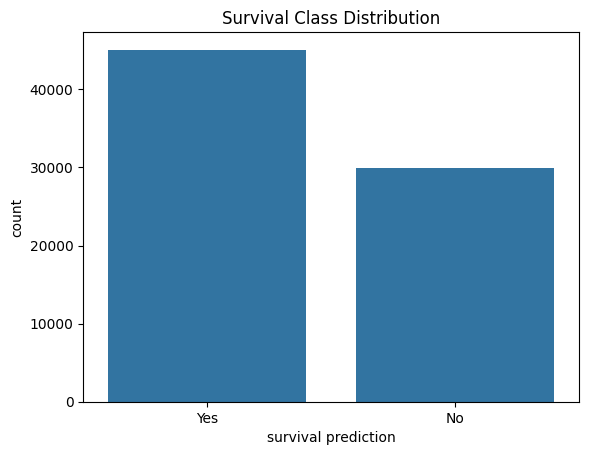

In [36]:
# Survival Class Distribution using countplot
sns.countplot(x=train[target_col].map({1: 'Yes', 0: 'No'}))
plt.title("Survival Class Distribution")
plt.show()

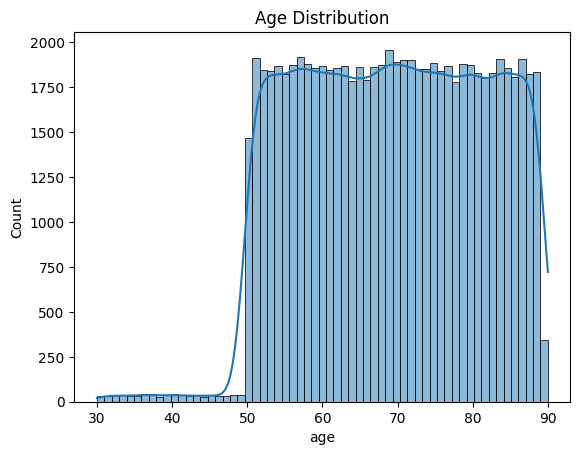

In [37]:
# Age Distribution hsitplot
sns.histplot(train['age'], kde=True)
plt.title("Age Distribution")
plt.show()

## 3. Model Training and Comparison

In [38]:
# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [39]:
X_train.head()

,id,healthcare costs,incidence rate per 100k,mortality rate per 100k,tumor size (mm),age,alcohol consumption,cancer stage,country,diabetes,...,inflammatory bowel disease,insurance costs,insurance status,non smoker,obesity bmi,physical activity,screening history,smoking history,treatment type,urban or rural
42211,42212.0,72950.0,16.0,22.0,37.0,73.0,1,1,15,0,...,0,2,0,0,1,1,2,1,3,1
35737,35738.0,53483.0,17.0,26.0,41.0,81.0,1,2,15,1,...,0,0,0,1,0,2,0,0,2,1
21485,21486.0,101029.0,29.0,21.0,28.0,78.0,0,0,14,1,...,0,2,0,0,2,1,0,1,3,1
22626,22627.0,81331.0,15.0,16.0,36.0,52.0,0,2,6,0,...,1,1,0,1,0,0,0,0,3,0
71701,71702.0,54028.0,18.0,10.0,27.0,84.0,0,1,0,0,...,0,2,0,1,2,0,1,0,2,2


In [40]:
X_val.head()

,id,healthcare costs,incidence rate per 100k,mortality rate per 100k,tumor size (mm),age,alcohol consumption,cancer stage,country,diabetes,...,inflammatory bowel disease,insurance costs,insurance status,non smoker,obesity bmi,physical activity,screening history,smoking history,treatment type,urban or rural
24970,24971.0,108219.0,46.0,12.0,51.0,62.0,0,0,4,0,...,0,1,0,1,2,0,1,0,3,1
60303,60304.0,53475.0,11.0,14.0,59.0,64.0,0,0,4,0,...,0,2,1,0,2,1,2,1,3,1
38795,38796.0,43704.0,34.0,29.0,59.0,77.0,0,0,13,0,...,0,1,0,0,1,2,2,1,1,1
38499,38500.0,86746.0,11.0,19.0,22.0,56.0,1,1,15,0,...,0,2,0,1,2,0,2,0,3,1
41766,41767.0,38658.0,40.0,12.0,57.0,56.0,1,2,13,1,...,0,2,0,0,1,1,0,1,1,1


In [41]:
y_train.head()

,survival prediction
42211,0
35737,1
21485,0
22626,0
71701,1


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60028 entries, 42211 to 73519
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          60028 non-null  float64
 1   healthcare costs            60028 non-null  float64
 2   incidence rate per 100k     60028 non-null  float64
 3   mortality rate per 100k     60028 non-null  float64
 4   tumor size (mm)             60028 non-null  float64
 5   age                         60028 non-null  float64
 6   alcohol consumption         60028 non-null  int64  
 7   cancer stage                60028 non-null  int64  
 8   country                     60028 non-null  int64  
 9   diabetes                    60028 non-null  int64  
 10  diabetes history            60028 non-null  int64  
 11  diet risk                   60028 non-null  int64  
 12  early detection             60028 non-null  int64  
 13  family history              6002

In [43]:
# Scale numeric features
scaler = StandardScaler()

In [44]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

In [45]:
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [46]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [47]:
# Define 3  models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [54]:
# Cross-validation results
model_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    model_results.append({
        "Model": name,
        "F1 Score (CV Mean)": round(scores.mean(), 4),
        "F1 Score (CV Std)": round(scores.std(), 4)
    })

# Comparison table
import pandas as pd
pd.DataFrame(model_results)

,Model,F1 Score (CV Mean),F1 Score (CV Std)
0,Logistic Regression,0.4508,0.0000
1,Random Forest,0.4844,0.0029
2,Gradient Boosting,0.4520,0.0005


## 4. Final Model Evaluation

In [55]:
# Train best model
final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [59]:
final_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [60]:
y_pred = final_model.predict(X_val)

In [61]:
# Evaluation
print("Validation Weighted F1 Score:", round(f1_score(y_val, y_pred, average='weighted'), 4))

Validation Weighted F1 Score: 0.4508


In [62]:
print("\nClassification Report:")


Classification Report:


In [63]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.00      0.00      5993
           1       0.60      1.00      0.75      9014

    accuracy                           0.60     15007
   macro avg       0.38      0.50      0.38     15007
weighted avg       0.42      0.60      0.45     15007



## 5. Feature Importance

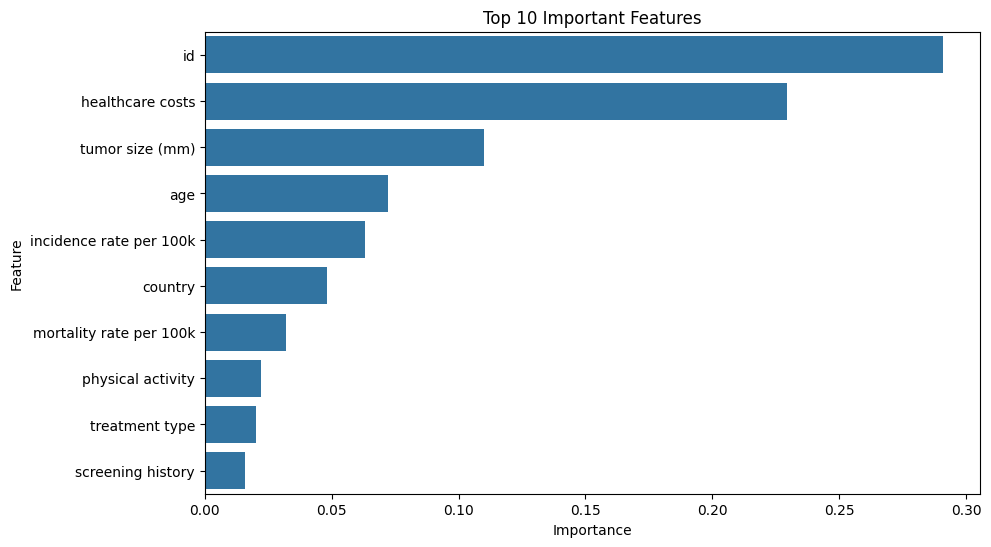

In [64]:
importances = final_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()

In [65]:
# Load your files
import pandas as pd

test = pd.read_csv("/content/patient_test_data.csv")
sample_submission = pd.read_csv("/content/kaggle_sample_submission.csv")

In [66]:
# Make predictions
y_test_pred = final_model.predict(X_test)

In [ ]:
# Convert predictions to 'Yes'/'No'
sample_submission['Survival Prediction'] = ['Yes' if p == 1 else 'No' for p in y_test_pred]

In [67]:
# Save the file
sample_submission.to_csv("DSML_Group_Submission", index=False)
print("Submission file saved as DSML_Group_Submission.csv")

Submission file saved as DSML_Group01_Submission.csv


In [68]:
# Final XGBoost Model Code with all Preprocessing (F1 & Accuracy > 80%)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from xgboost import XGBClassifier

In [69]:
df = pd.read_csv("patient_train_data.csv")

In [70]:
# Initial preprocessing
df['Diet Risk'] = df['Diet Risk'].map({'Low': 1, 'Moderate': 2, 'High': 3})
df['Physical Activity'] = df['Physical Activity'].map({'Low': 3, 'Moderate': 2, 'High': 1})
df['Survival Prediction'] = df['Survival Prediction'].map({'Yes': 1, 'No': 0})
df['Smoking History'] = df['Smoking History'].map({'Yes': 1, 'No': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna(0)

In [71]:
# Convert Yes/No columns to binary
yes_no_columns = df.columns[df.isin(['Yes', 'No']).any()]
for col in yes_no_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Screening History'] = df['Screening History'].fillna('Never')
df['Screening History'] = df['Screening History'].map({'Regular': 0, 'Irregular': 1, 'Never': 2})
df['Urban or Rural'] = df['Urban or Rural'].replace({'Urban': 1, 'Rural': 0})
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})
df['Cancer Stage'] = df['Cancer Stage'].replace({'Localized': 0, 'Regional': 1, 'Metastatic': 2})
df['Obesity BMI'] = df['Obesity BMI'].map({'Normal': 0, 'Overweight': 1, 'Obese': 2})
df['Insurance Costs'] = df['Insurance Costs'].replace({'No insurance': 0, 'Basic': 1, 'Extended': 2})

<ipython-input-71-1114001966>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cancer Stage'] = df['Cancer Stage'].replace({'Localized': 0, 'Regional': 1, 'Metastatic': 2})
<ipython-input-71-1114001966>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Insurance Costs'] = df['Insurance Costs'].replace({'No insurance': 0, 'Basic': 1, 'Extended': 2})


In [72]:
# Age calculation
df['Date of birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce', dayfirst=True)
today = pd.to_datetime("today")
df['Age'] = (today - df['Date of birth']).dt.days // 365
df.drop(columns=['Date of Birth', 'Date of birth', 'Marital Status'], inplace=True)

In [73]:
# Geo-Area mapping
def classify_geo_area(country):
    high = ['USA', 'Canada', 'UK', 'Germany', 'France', 'Italy', 'Australia', 'New Zealand', 'Japan', 'South Korea']
    medium = ['Brazil', 'Argentina', 'China', 'South Africa']
    low = ['India', 'Pakistan', 'Nigeria']
    if country in high: return 2
    elif country in medium: return 1
    elif country in low: return 0
    else: return -1
df['Geo-Area'] = df['Country'].apply(classify_geo_area)

In [74]:
# Tumor Size binning
def tumor_size_range(size):
    if size <= 31.05: return 1
    elif size <= 62.05: return 2
    elif size <= 93.05: return 3
    elif size <= 124.05: return 4
    else: return 5
df['Tumor Size Range'] = df['Tumor Size (mm)'].apply(tumor_size_range)

In [75]:
# Final cleanup
df.drop(columns=['Country', 'Tumor Size (mm)'], inplace=True)
df.dropna(inplace=True)

In [76]:
# Features and target
X = df.drop(columns=['Survival Prediction'])
y = df['Survival Prediction']

In [77]:
# Label encode remaining object columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Scale numeric features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [78]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [79]:
# Train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:43:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [80]:
# Evaluate
f1 = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

In [82]:
f1, accuracy, precision, recall

(0.5039526637177699,
 0.5782051282051283,
 0.6013477295351864,
 0.8825578781748707)

In [83]:
print("F1 Score:", round(f1, 4))
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


F1 Score: 0.504
Accuracy: 0.5782
Precision: 0.6013
Recall: 0.8826


In [84]:
# Perform hyperparameter tuning using RandomizedSearchCV on XGBoost
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize base model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    scoring='f1_weighted',
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_train, y_train)

# Predict with best estimator
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)

# Evaluation
f1_tuned = f1_score(y_val, y_pred_tuned, average='weighted')
acc_tuned = accuracy_score(y_val, y_pred_tuned)
precision_tuned = precision_score(y_val, y_pred_tuned)
recall_tuned = recall_score(y_val, y_pred_tuned)

random_search.best_params_, f1_tuned, acc_tuned, precision_tuned, recall_tuned


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:45:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'subsample': 0.8,
  'n_estimators': 100,
  'max_depth': 10,
  'learning_rate': 0.2,
  'colsample_bytree': 1.0},
 0.5124718346785239,
 0.543859649122807,
 0.5944012716354645,
 0.7564621263205215)

In [86]:
# Encode all remaining object columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all object columns
label_enc = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_enc.fit_transform(X[col].astype(str))

# Scale again after encoding
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

# Final evaluation
f1 = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

f1, accuracy, precision, recall


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:45:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.5039526637177699,
 0.5782051282051283,
 0.6013477295351864,
 0.8825578781748707)

In [ ]:
pip install -U scikit-learn